In [1]:
import matplotlib.pyplot as plt
import numpy as np

## SOEE3250/SOEE5675M/5116

Inverse Theory

# Practical 6: Regularisation
In this practical you will learn how to set up an ill-posed fault-slip inversion problem and solve it using Tikhonov Regularisation.

<img src="../Figures/Prac6_fig1.png" alt="drawing" style="width:400px;"/>
Figure 1. An aerial view of horizontal GPS displacements caused by rupture of a vertical strike-slip fault (surface trace along y=0). The goal of this practical is to determine the distribution of slip on the fault. 

The vertical fault plane is discretised into 5 x 10 patches as shown below, on an east-west striking fault plane, 20 km long, between the surface and 10 km in depth, and centred on coordinates (0,0). 

<img src="../Figures/Prac6_fig2.png" alt="drawing" style="width:500px;"/>
Figure 2. The discretisation of the vertical fault.

## Model setup
The model vector $\bf m$ describes the slip on each patch, the matrix $G$ describes the predicted surface deformation for a specified slip distribution, and the data vector $\bf d$ describes the $x$ and $y$ displacement of a set of GPS receivers numbered as $1,2,3,\dots, 50$.
These take the form
${\bf m} = \left[ \begin{array}{c} s_1 \\ s_2 \\ \vdots \\ s_M \end{array}\right] \qquad G = \left[ \begin{array}{ccc} 
g_{1,1}^x & \dots & g_{1,M}^x \\
g_{2,1}^x & \dots & g_{2,M}^x \\
& \vdots &\\
g_{N,1}^x & \dots & g_{N,M}^x \\
g_{1,1}^y & \dots & g_{1,M}^y \\
g_{2,1}^y & \dots & g_{2,M}^y \\
& \vdots &\\
g_{N,1}^y & \dots & g_{N,M}^y
\end{array}\right] \qquad {\bf d} = \left[ \begin{array}{c} U_1^x \\ U_2^x \\ U_3^x \\ \vdots \\ U_N^x \\ U_1^y \\ U_2^y \\ U_3^y \\ \vdots \\ U_N^y \end{array}\right]$ 




In [2]:
# Assemble the data vector d and forward model G
X, Y, East_displacement, North_displacement = np.loadtxt('data.txt', unpack=True)
East_model = np.loadtxt('east.txt')
North_model = np.loadtxt('north.txt')
G= np.vstack((East_model,North_model))
d= np.vstack((East_displacement.reshape((64,1)), North_displacement.reshape((64,1))));

# The vector d (observed displacements) and matrix G (the forward model) are now defined.
# X and Y give the positions of the observed displacements.

Q1) Using the plt.quiver command, reproduce figure 1 by making a plot of the displacements. 

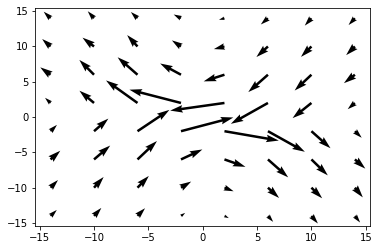

In [3]:
plt.figure()
plt.quiver(X,Y,d[:64], d[64:]);

Here is a plot of the predicted displacement for a slip of 1m on fault patch 1 (upper most patch on the left side)

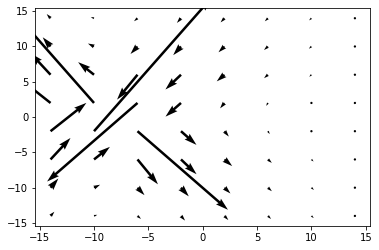

In [4]:
plt.figure()
plt.quiver(X,Y,G[:64,0], G[64:,0]);

Q2) Explain the relevance of the matrix entries of G in the above code. Now calculate the predicted slip of the lower most patch on the left (patch 5, Python index 4), and the uppermost patch on the right. Comment on the relative size of the arrows. Is this what you expect? At what x-position are the deformations strongest?

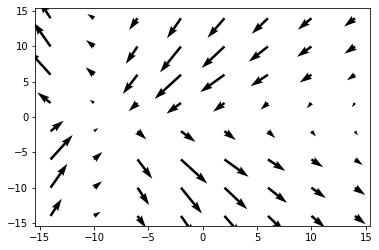

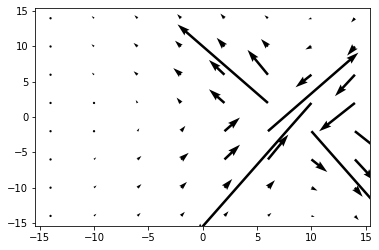

In [5]:
for n in [4,45]:  #i.e. 5 and 46 in figure 2
    plt.figure()
    plt.quiver(X,Y,G[:64,n], G[64:,n]);

Deeper patches have smaller surface displacements (shorter arrows). Patch 46 has most effect on the surface around x=10.
Patch 1 has most effect around x=-10.

Q3) Calculate the SVD decomposition of G. Plot the singular values with their index, and display to the screen the smallest value. How many singular values are smaller than 1% of the maximum singular value? (for this, amend the code below).

# If the singular values are stored in diagS, then this displays the number of values smaller than 1% of the maximum.
print('{0:d} small singular values'.format( np.sum(diagS < 0.01 * max(diagS))))


Min singular value is  3.751728418598901e-08
29 small singular values


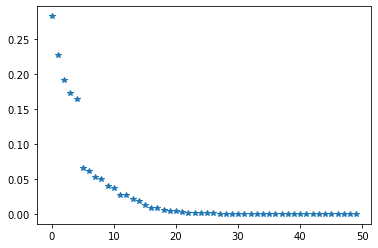

In [6]:
U,diagS, Vt = np.linalg.svd(G);
plt.figure()
plt.plot(diagS,'*')
print('Min singular value is ', min(diagS) )
print('{0:d} small singular values'.format( np.sum(diagS < 0.01 * max(diagS))))


Q4) Calculate the least squares solution mhat, using G and d.

In [7]:
mhat = np.linalg.inv( G.transpose() @ G) @ G.transpose() @ d

Q5) Display the solution, reshaped to the appropriate 5x10 structure. Note that we need to use the order='F' argument because our numbering is **F**ortran-like (i.e. column wise) and not Python-like (row wise).

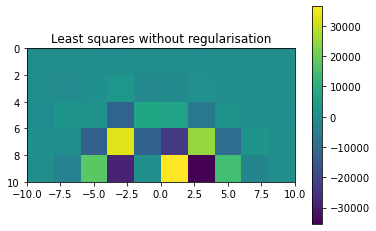

In [8]:
plt.figure()
plt.imshow( mhat.reshape((5,10),order='F'),extent=(-10,10,10,0))
plt.title('Least squares without regularisation')
plt.colorbar();

Q6) Comment on the scale of the model vector above. 

It is numerically spurious: the nearly zero singular values turn numerical imprecision into a crazy model.

Q7) Calculate the surface deformation associated with this model and plot it alongside the data - how does it compare?

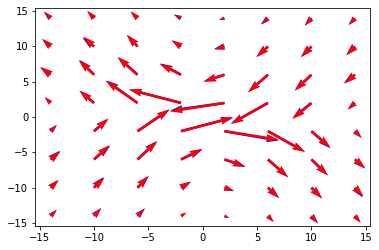

In [14]:
plt.figure()
d_hat=G@mhat
plt.quiver(X,Y,East_displacement,North_displacement,color = 'blue');
plt.quiver(X,Y,d_hat[:64],d_hat[64:],color = 'red');

Although the model is crazy (and very complex), it does reproduce the data.

Q8) Now add Tikhonov regularisation to the inversion: set mu=0.01 and re-estimate the model parameters using damped least squares (slide 17 of lecture 6). Visualise the model slip: is the solution smoother than before - what is the scale of the displacement? 
Make a plot of the predicted displacement vectors alongside the data.
How good is the fit to the data now?
NB: use np.eye(50) for the 50x50 identity matrix

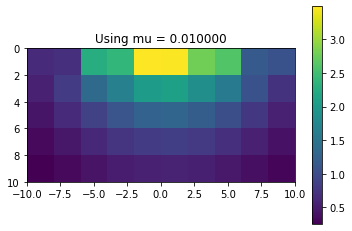

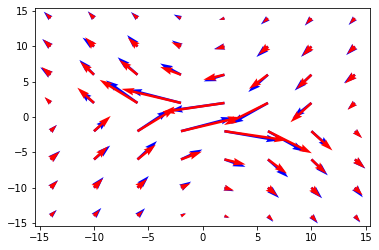

In [9]:
mu=1e-2
mtik=np.linalg.inv(G.transpose()@G+mu*np.eye(50))@G.transpose()@d
plt.figure()
plt.imshow( mtik.reshape((5,10),order='F'),extent=(-10,10,10,0))
plt.title('Using mu = {0:f}'.format(mu))
plt.colorbar();

plt.figure()
d_hat=G@mtik
plt.quiver(X,Y,East_displacement,North_displacement,color = 'blue');
plt.quiver(X,Y,d_hat[:64],d_hat[64:],color = 'red');

The model is much smoother with displacements of 1-3m, compared with 30km as above. However, the data is fit marginally less well.

Q9) Reestimate the model using mu=1e-6.  Visualise the model slip: is the solution smoother than before - what is the scale of the displacement? 
Make a plot of the predicted displacement vectors alongside the data.
How good is the fit to the data now?

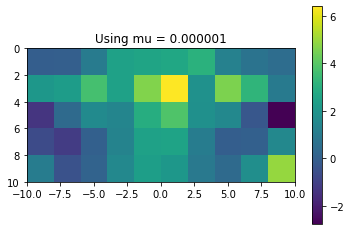

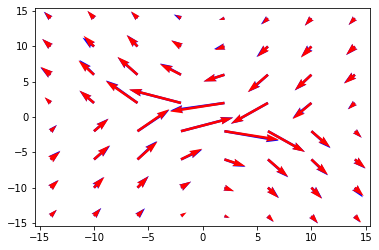

In [10]:
mu=1e-6
mtik=np.linalg.inv(G.transpose()@G+mu*np.eye(50))@G.transpose()@d
plt.figure()
plt.imshow( mtik.reshape((5,10),order='F'),extent=(-10,10,10,0))
plt.title('Using mu = {0:f}'.format(mu))
plt.colorbar();
plt.figure()
d_hat=G@mtik
plt.quiver(X,Y,East_displacement,North_displacement,color = 'blue');
plt.quiver(X,Y,d_hat[:64],d_hat[64:],color = 'red');

The model is more complex (it has higher slip values) but fits the data better.

Q10) Re-estimate the model parameters for various values of mu between 1x$10^{-6}$ and 1x$10^{-2}$, and calculate the norm of the residuals and the norm of the model values each time. Plot the residual norm vs the model norm, which represents the trade-off curve. Add a red star corresponding to the value of mu chosen by the discrepancy principle, which is 0.0002117.
Recall that this gives the residual norm closest to $\sqrt{N} \sigma$, where N is the number of measurements, and $\sigma$ is the standard deviation of the measurements (0.01 m). Does it seem a reasonable compromise in terms of the keeping both norms small?

In [17]:
# Amend the following code:
N = 400
trialmu=10**np.linspace(-6,-2,N)
resnorm=np.zeros((N,1));
modelnorm=np.zeros((N,1));
for i in range(N):
    mu=trialmu[i]
    #mtik=
    #resnorm[i]=np.linalg.norm();
    #modelnorm[i]=np.linalg.norm();

# To find the index that minimises the difference between two vectors, use np.argmin

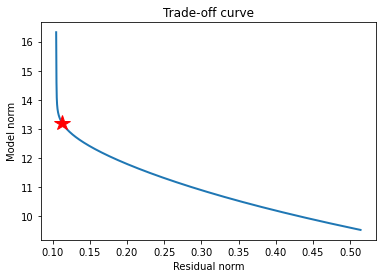

In [11]:
N = 400
trialmu=10**np.linspace(-6,-2,N)
resnorm=np.zeros((N,1));
modelnorm=np.zeros((N,1));
for i in range(N):
    mu=trialmu[i]
    mtik=np.linalg.inv(G.transpose()@G+mu*np.eye(50))@G.transpose()@d
    resnorm[i]=np.linalg.norm(d-G@mtik);
    modelnorm[i]=np.linalg.norm(mtik);
plt.figure()
plt.plot(resnorm,modelnorm,lw=2)
plt.title('Trade-off curve')
plt.xlabel('Residual norm')
plt.ylabel('Model norm')

index=np.argmin(np.abs(resnorm-np.sqrt(len(d))*0.01));
mu_tik=trialmu[index]
plt.plot(resnorm[index],modelnorm[index],'r*',markersize=16);


Q11) For the value of mu chosen by the discrepancy principle, visualise the slip distribution and plot the surface deformation.

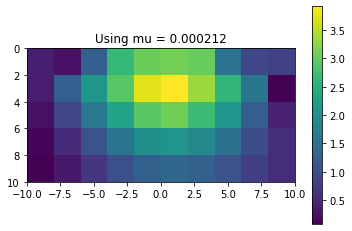

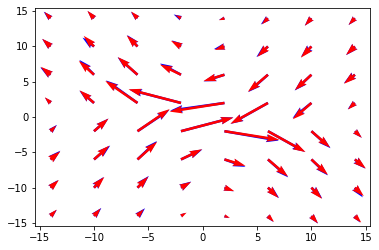

In [12]:
mu=trialmu[index]
mtik=np.linalg.inv(G.transpose()@G+mu*np.eye(50))@G.transpose()@d
plt.figure()
plt.imshow( mtik.reshape((5,10),order='F'),extent=(-10,10,10,0))
plt.title('Using mu = {0:f}'.format(mu))
plt.colorbar();
plt.figure()
d_hat=G@mtik
plt.quiver(X,Y,East_displacement,North_displacement,color = 'blue');
plt.quiver(X,Y,d_hat[:64],d_hat[64:],color = 'red');

Q12) Calculate and visualise the resolution matrix for this value of mu, using plt.imshow().

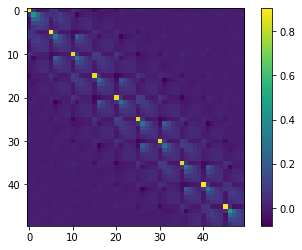

In [13]:
R=np.linalg.inv(G.transpose()@G+mu*np.eye(50))@G.transpose()@G;
plt.figure()
plt.imshow(R)
plt.colorbar();

Q13) Visualise (in the 5x10 block form) the diagonal of the resolution matrix. What does this tell you?
You can find the diagonal of a matrix A using np.diag(A).

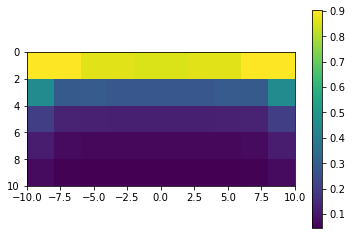

In [14]:
plt.figure()
plt.imshow( np.diag(R).reshape((5,10),order='F'),extent=(-10,10,10,0) )
plt.colorbar();

The diagonal elements describe how well the model values are reproduced by the inversion. The model values in the upper layer are well reproduced (values close to 1) but in lower layers less so. The bottom layer is the least well reproduced.

Q14) Optional: use cross validation to pick the optimal value of mu, and compare to the value using the discrepancy principle

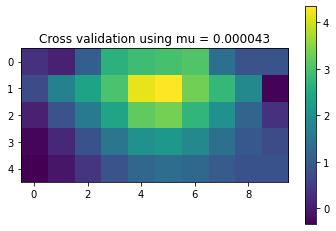

In [15]:
Vsave=np.zeros((N,1));
for i in range(N):
    mu=trialmu[i];
    V=0;
    for j in range(2*64):
        Gk=np.delete(G,j,axis=0)
        dk=np.delete(d,j,axis=0)
        mtik=np.linalg.inv(Gk.transpose()@Gk+mu*np.eye(50))@Gk.transpose()@dk
        V=V+(d[j]-G[j,:]@mtik)**2;
    Vsave[i]=V;

index = np.argmin(Vsave)
mu=trialmu[index];
mtik=np.linalg.inv(G.transpose()@G+mu*np.eye(50))@G.transpose()@d
plt.figure()
plt.imshow( mtik.reshape((5,10),order='F'))
plt.colorbar()
plt.title('Cross validation using mu = {0:f}'.format(mu));